## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
for i in df.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

## Data preprocessing

In [6]:
data = df[["iyear", "imonth", "iday", "country_txt", "provstate", "region_txt",
          "latitude", "longitude", "attacktype1_txt", "targtype1", "nkill",
          "nwound", "summary", "gname", "targtype1_txt", "weaptype1_txt", "motive"]]

In [7]:
data.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,latitude,longitude,attacktype1_txt,targtype1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,14,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),7,0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,10,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.rename(columns = {"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country", "provstate" : "State", "region_txt" : "Region",
                       "latitude" : "Latitude", "longitude" : "Longitude", "attacktype1_txt" : "AttackType", "targtype1" : "Target", "nkill" : "Killed",
                       "nwound" : "Wounded", "summary" : "Summary", "gname" : "Group", "targtype1_txt" : "Target_type", "weaptype1_txt" : "Weapon_type", "motive" : "Motive"}, inplace = True)

In [9]:
data.head()

,Year,Month,Day,Country,State,Region,Latitude,Longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,14,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),7,0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,10,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
data.shape

(181691, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Target       181691 non-null  int64  
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 23.6+ MB


In [12]:
data.describe(include = 'all')

,Year,Month,Day,Country,State,Region,Latitude,Longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,177135.000000,1.771340e+05,181691,181691.000000,171378.000000,165380.000000,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2855,12,NaN,NaN,9,NaN,NaN,NaN,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,NaN,NaN,Bombing/Explosion,NaN,NaN,NaN,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,NaN,NaN,88255,NaN,NaN,NaN,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,8.439719,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,6.653838,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,3.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,4.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,14.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
duplicate_values = data.duplicated()
duplicate_values.value_counts()

False    170155
True      11536
dtype: int64

In [14]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
data

,Year,Month,Day,Country,State,Region,Latitude,Longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,14,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),7,0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,10,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,7,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,2.359673,45.385034,Armed Assault,4,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,35.407278,35.942679,Bombing/Explosion,4,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,6.900742,124.437908,Facility/Infrastructure Attack,14,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,24.798346,93.940430,Bombing/Explosion,2,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [15]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
State            2855
Region             12
Latitude        48322
Longitude       48039
AttackType          9
Target             22
Killed            205
Wounded           238
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [16]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
Latitude         3928
Longitude        3929
AttackType          0
Target              0
Killed           9135
Wounded         14944
Summary         57130
Group               0
Target_type         0
Weapon_type         0
Motive         120278
dtype: int64

In [17]:
data['Killed'].fillna(0, inplace = True)
data['Wounded'].fillna(0, inplace = True)

In [18]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
Latitude         3928
Longitude        3929
AttackType          0
Target              0
Killed              0
Wounded             0
Summary         57130
Group               0
Target_type         0
Weapon_type         0
Motive         120278
dtype: int64

## Basic insights

In [19]:
print("Country with most attacks: ", data['Country'].value_counts().idxmax())
print("City with most attacks: ", data['State'].value_counts().idxmax())
print("Region with most attacks: ", data['Region'].value_counts().idxmax())
print("Year with most attacks: ", data['Year'].value_counts().idxmax())
print("Month with most attacks: ", data['Month'].value_counts().idxmax())
print("Group with most attacks: ", data['Group'].value_counts().index[1])
print("Most Attack Types: ", data['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


## Visualizations

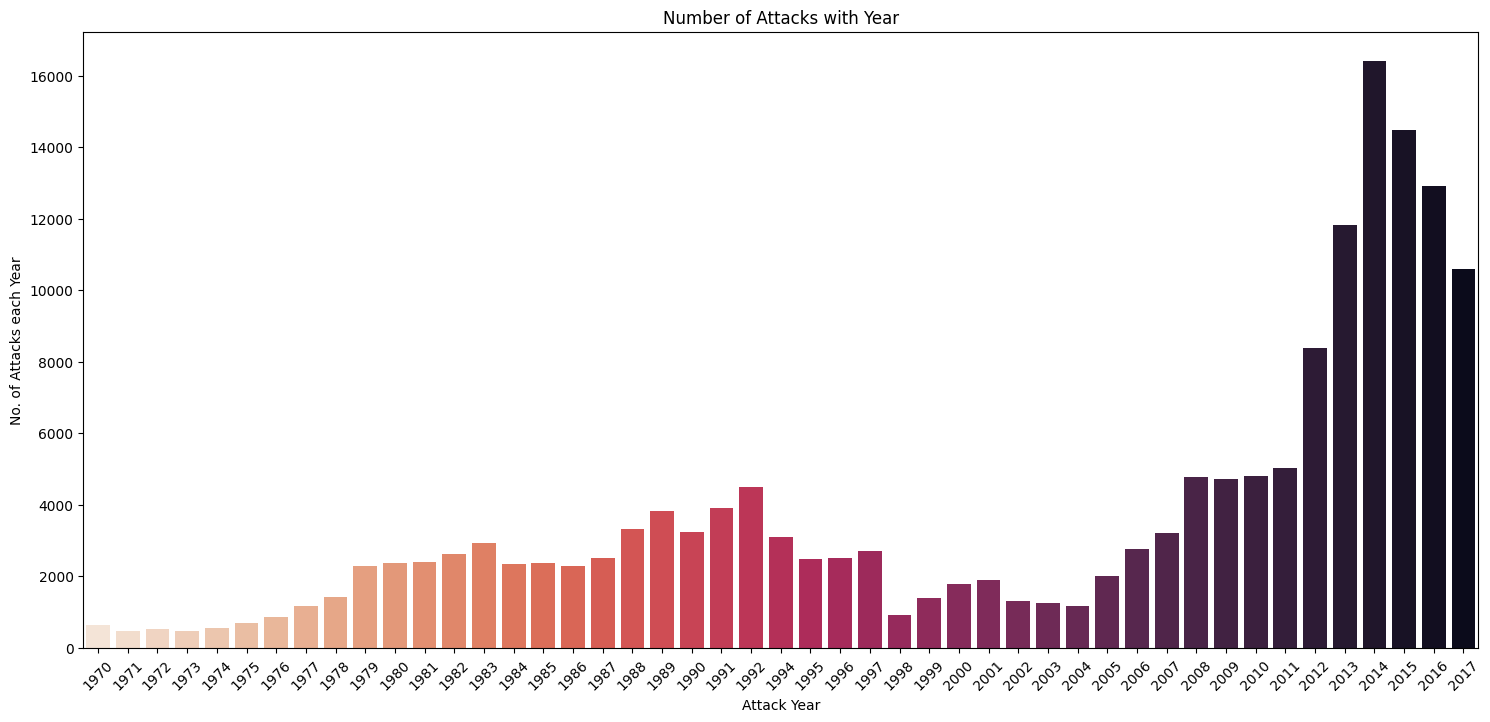

In [20]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket_r')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel("No. of Attacks each Year")
plt.title('Number of Attacks with Year')
plt.show()

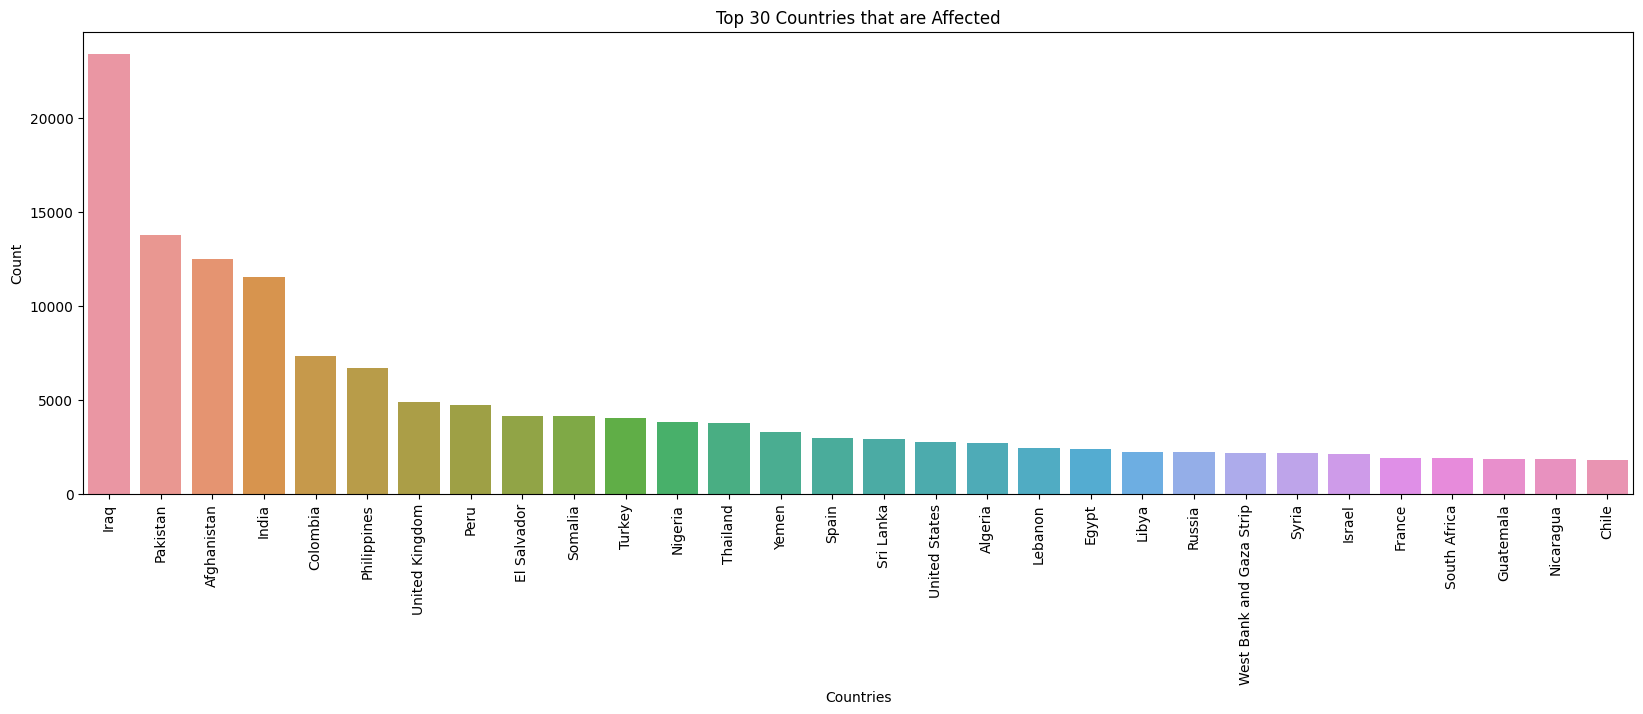

In [21]:
plt.subplots(figsize=(20, 6))
sns.barplot(x=data['Country'].value_counts()[:30].index, y=data['Country'].value_counts()[:30].values)
plt.title('Top 30 Countries that are Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


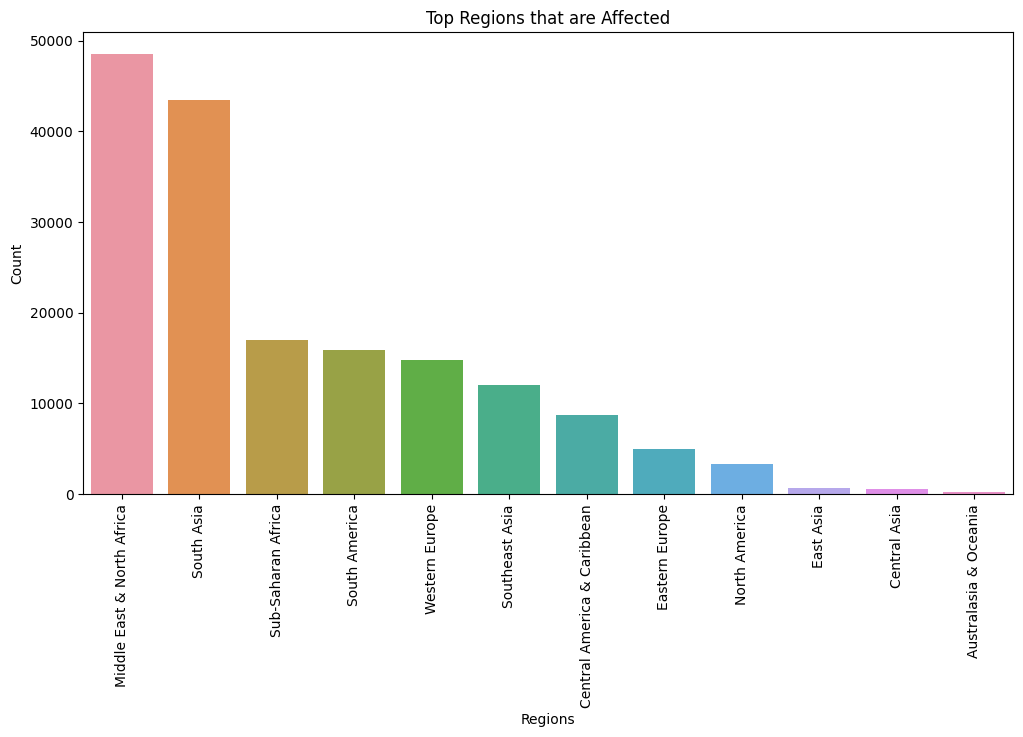

In [22]:
plt.subplots(figsize = (12,6))
sns.barplot(x = data['Region'].value_counts().index, y = data['Region'].value_counts().values)
plt.title('Top Regions that are Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

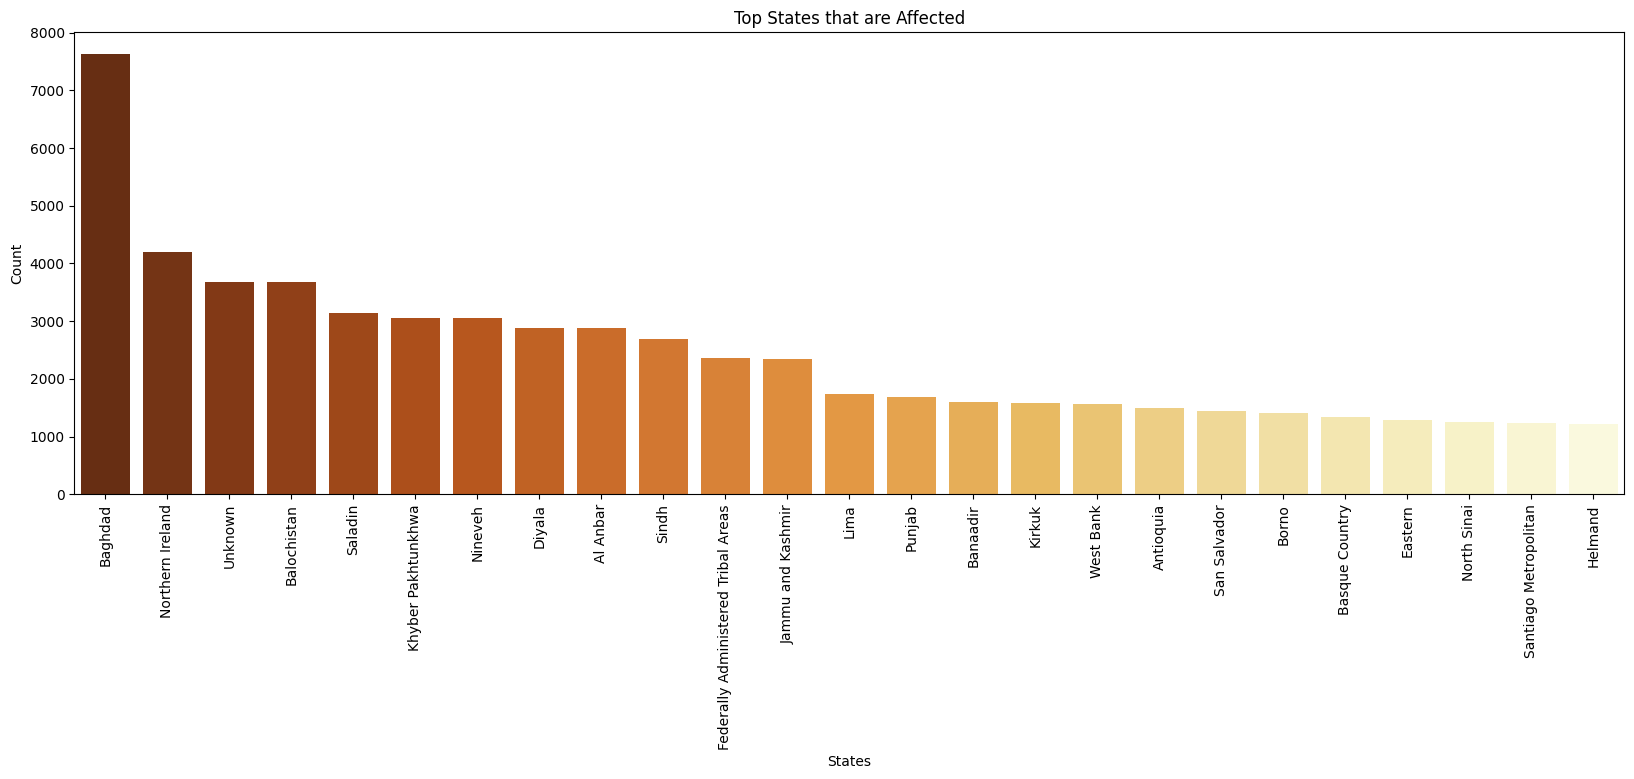

In [23]:
plt.subplots(figsize = (20,6))
sns.barplot(x = data['State'].value_counts()[:25].index, y = data['State'].value_counts()[:25].values, palette = 'YlOrBr_r')
plt.title("Top States that are Affected")
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

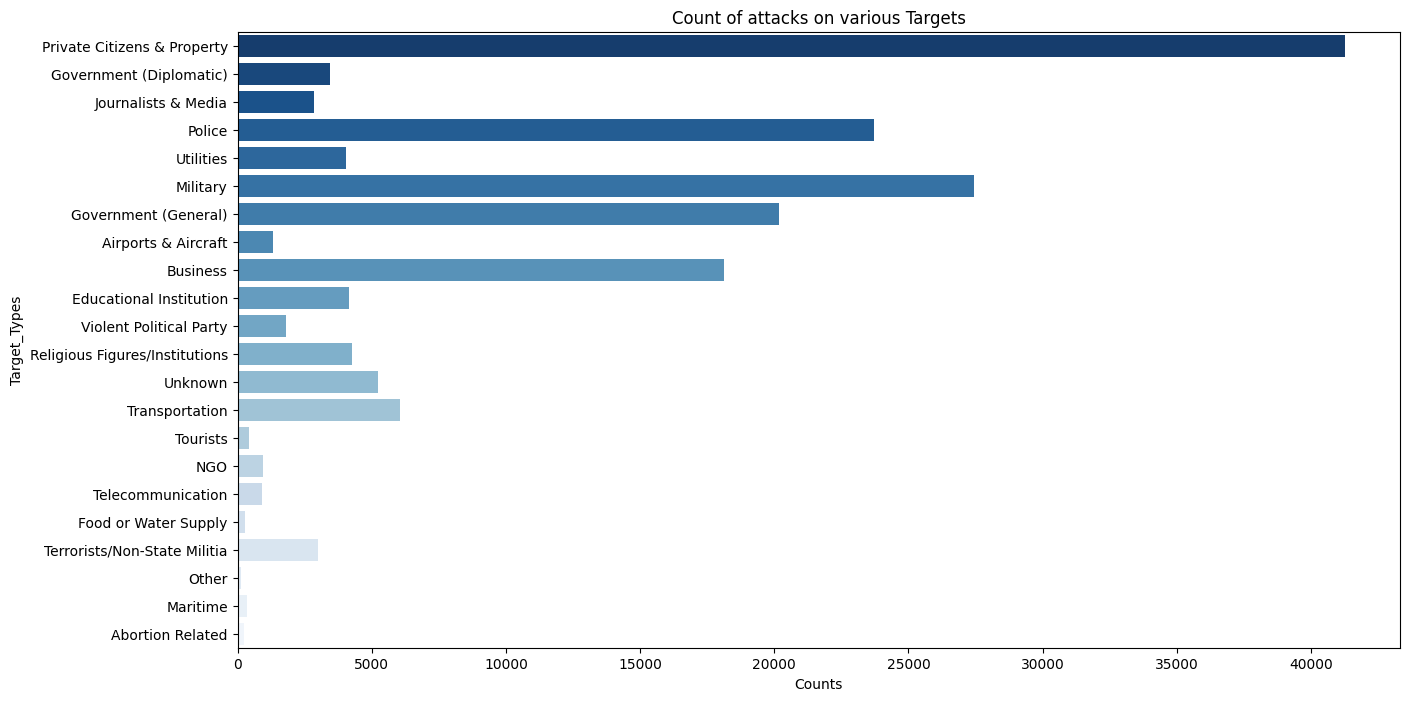

In [24]:
plt.figure(figsize = (15,8))
sns.countplot(y = data['Target_type'], palette = 'Blues_r')
plt.title('Count of attacks on various Targets')
plt.xlabel('Counts')
plt.ylabel('Target_Types')
plt.show()

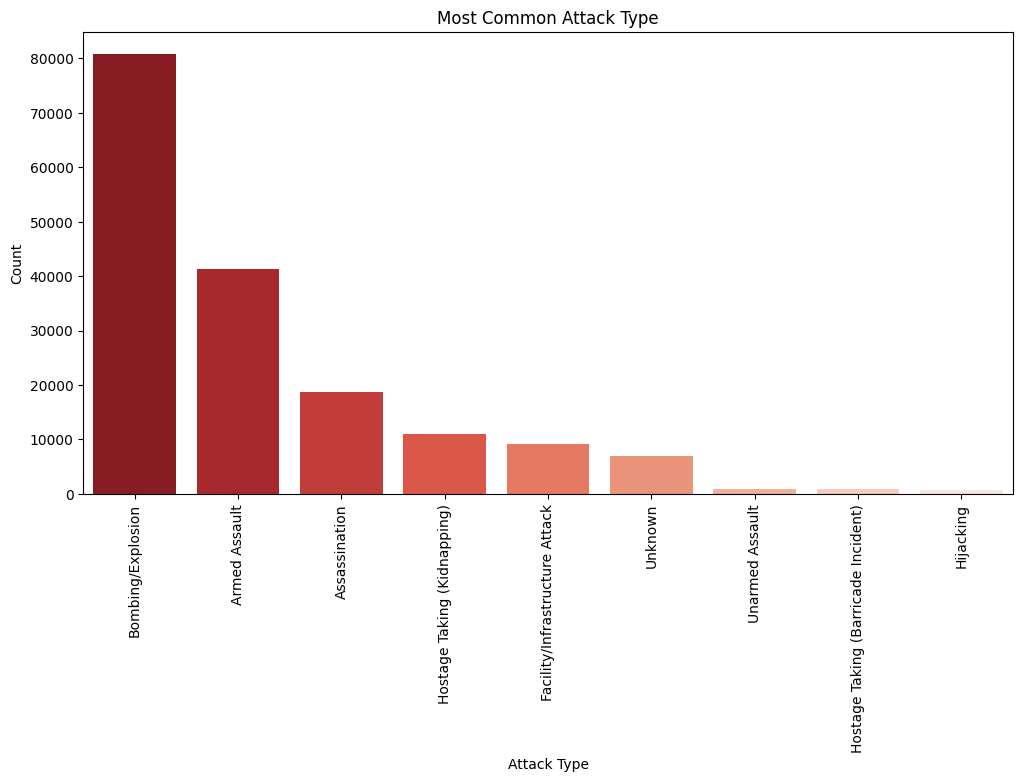

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = data['AttackType'].value_counts().index, y = data['AttackType'].value_counts().values, palette = 'Reds_r')
plt.title('Most Common Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

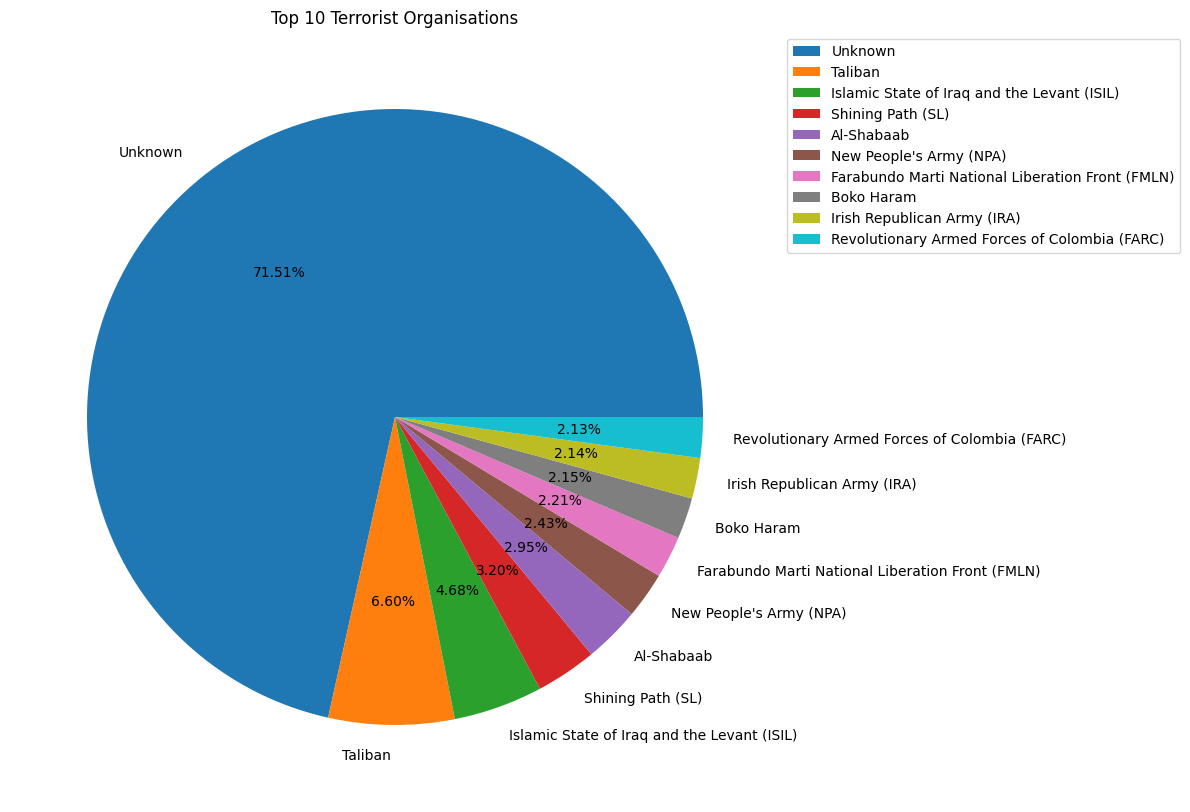

In [26]:
plt.figure(figsize = (10,10))
plt.pie(data['Group'].value_counts()[:10].values, labels = data['Group'].value_counts()[:10].index, autopct = '%1.2f%%')
plt.title('Top 10 Terrorist Organisations')
plt.legend(bbox_to_anchor = (1.0,1.0))
plt.show()

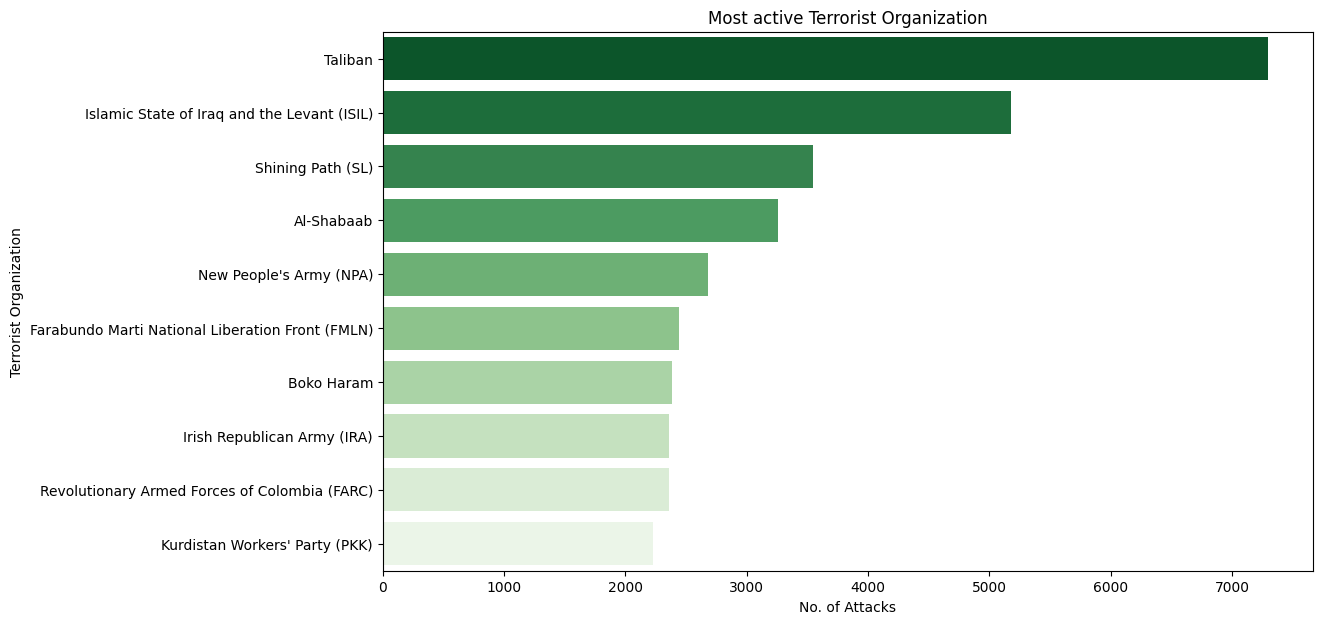

In [27]:
plt.figure(figsize = (12,7))
sns.barplot(x = data['Group'].value_counts()[1:11].values, y = data['Group'].value_counts()[1:11].index, palette = 'Greens_r')
plt.xlabel('No. of Attacks')
plt.ylabel("Terrorist Organization")
plt.title('Most active Terrorist Organization')
plt.show()